## Este Assignment pertence ao curso [Applied Plotting, Charting & Data Representation in Python](https://www.coursera.org/learn/python-plotting?specialization=data-science-python) da especialização da Universidade de Michigan

# My assignment is about the soccer team of the Linhares city

Based on the data I found, I tried to answer the question: **How was the team's performance in the last 10 years?**

#### Links:

       There aren't any csv file, I had to scrape  :(

https://www.ogol.com.br/team_matches.php?grp=0&ond=&compet_id_jogos=0&ved=&ano=2020&comfim=0&id=9783&equipa_1=9783&menu=allmatches&type=year&op=ver_confronto

https://www.flashscore.com.br/equipe/linhares/ppPIY1sk/

In [2]:
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [109]:
df2019 = pd.read_csv('linhares (1).csv')
df2018 = pd.read_csv('linhares (2).csv')
df2017 = pd.read_csv('linhares (3).csv')
df2016 = pd.read_csv('linhares (4).csv')
df2015 = pd.read_csv('linhares (5).csv')
df2014 = pd.read_csv('linhares (6).csv')
df2013 = pd.read_csv('linhares (7).csv')
df2012 = pd.read_csv('linhares (8).csv')
df2011 = pd.read_csv('linhares (9).csv')
df2010 = pd.read_csv('linhares (10).csv')

df2019 = df2019.iloc[:,2:]
df2018 = df2018.iloc[:,2:]
df2017 = df2017.iloc[:,2:]
df2016 = df2016.iloc[:,2:]
df2015 = df2015.iloc[:,2:]
df2014 = df2014.iloc[:,2:]
df2013 = df2013.iloc[:,2:]
df2012 = df2012.iloc[:,2:]
df2011 = df2011.iloc[:,2:]
df2010 = df2010.iloc[:,2:]

In [110]:
df_1 = df2019.iloc[:,0]
df_1.dropna(inplace = True)
df_1 = df_1.reset_index()
df_1 = df_1.iloc[:,1]

df_2 = df2019.iloc[:,1]
df_2.dropna(inplace = True)
df_2 = df_2.reset_index()
df_2 = df_2.iloc[:,1]

df_3 = df2019.iloc[:,2]
df_3.dropna(inplace = True)
df_3 = df_3.reset_index()
df_3 = df_3.iloc[:,1]
df_2019 = pd.DataFrame([df_1,df_2,df_3]).T

In [111]:
#Iterei manualmente aumentando o valor de i e modificando a última linha. Fiz isso pois o for estava com um problem que 
#desconheço e dessa forma seria mais rápido do que tentar resolver o problema.

dfs = [df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011,df2010]
i = 9

df_1[i] = dfs[i].iloc[:,0]
df_1[i].dropna(inplace=True)
df_1[i] = df_1[i].reset_index()
df_1[i] = df_1[i].iloc[:,1]
    
df_2[i] = dfs[i].iloc[:,1]
df_2[i].dropna(inplace=True)
df_2[i] = df_2[i].reset_index()
df_2[i] = df_2[i].iloc[:,1]
    
df_3[i] = dfs[i].iloc[:,2]
df_3[i].dropna(inplace=True)
df_3[i] = df_3[i].reset_index()
df_3[i] = df_3[i].iloc[:,1]

dfs[i] = pd.DataFrame([df_1[i],df_2[i],df_3[i]]).T
df_2010 = dfs[i]

**These are my new datasets: df_2019, df_2018, df_2017, df_2016, df_2015, df_2014, df_2013, df_2012, df_2011, df_2010**

In [67]:
df = pd.concat([df_2019, df_2018, df_2017, df_2016, df_2015, df_2014, df_2013, df_2012, df_2011, df_2010]).reset_index().iloc[:,1:]
df.head()

,adversario,placar,onde
0,Vilavelhense,5-0,(F)
1,Sport Clube Capixaba,4-4,(C)
2,Sport Clube Capixaba,0-1,(F)
3,São Mateus,1-1,(C)
4,Vilavelhense,0-3,(F)


#### Exporting the data frame in case the notebook crash

In [6]:
df.to_csv('jogos_linhares.csv',index = False)

Done! Now, I'm creating a new column to separate the amount of goals of each team

In [3]:
df = pd.read_csv('jogos_linhares.csv')
df.dropna(inplace = True)
df = df.reset_index()
df = df.iloc[:,1:]
df.head()

,adversario,placar,onde
0,Vilavelhense,5-0,(F)
1,Sport Clube Capixaba,4-4,(C)
2,Sport Clube Capixaba,0-1,(F)
3,São Mateus,1-1,(C)
4,Vilavelhense,0-3,(F)


In [9]:
goals_other = []
goals_lin = []
i=0

for i in range(0,len(df)):
    if df['onde'][i] == '(F)':
        goals_other.append(df['placar'][i][0])
        goals_lin.append(df['placar'][i][2])
        
    if df['onde'][i] == '(C)':        
        goals_other.append(df['placar'][i][2])
        goals_lin.append(df['placar'][i][0])        


In [10]:
df['Other teams Goals'] = goals_other
df['Linhares Goals'] = goals_lin
df['Team of my City'] = ['Linhares'] * len(df)
df = df.drop(['placar','onde'],axis = 1)
df.head()

,adversario,Other teams Goals,Linhares Goals,Team of my City
0,Vilavelhense,5,0,Linhares
1,Sport Clube Capixaba,4,4,Linhares
2,Sport Clube Capixaba,0,1,Linhares
3,São Mateus,1,1,Linhares
4,Vilavelhense,0,3,Linhares


In [11]:
df.dtypes

adversario           object
Other teams Goals    object
Linhares Goals       object
Team of my City      object
dtype: object

In [12]:
df['Linhares Goals'] = df['Linhares Goals'].astype(int)
df['Other teams Goals'] = df['Other teams Goals'].astype(int)

### Now my DataFrame is ready for analysis

just saving one more time...

In [13]:
df.to_csv('linharesFinal.csv', index = False)

In [15]:
df = pd.read_csv('linharesFinal.csv')

In [16]:
vic = []
los = []
draw = []

for j in range(0,len(df)):
    if df['Linhares Goals'][j] > df['Other teams Goals'][j]:
        vic.append(+1)
    elif df['Linhares Goals'][j] < df['Other teams Goals'][j]:
        los.append(+1)
    else:
        draw.append(+1)

In [17]:
len(vic) + len(los) + len(draw) == len(df)

True

In [18]:
victory_percentage = round((len(vic) / len(df))*100,2)
loses_percentage = round((len(los) / len(df))*100,2)
draw_percentage = round((len(draw) / len(df))*100,2)

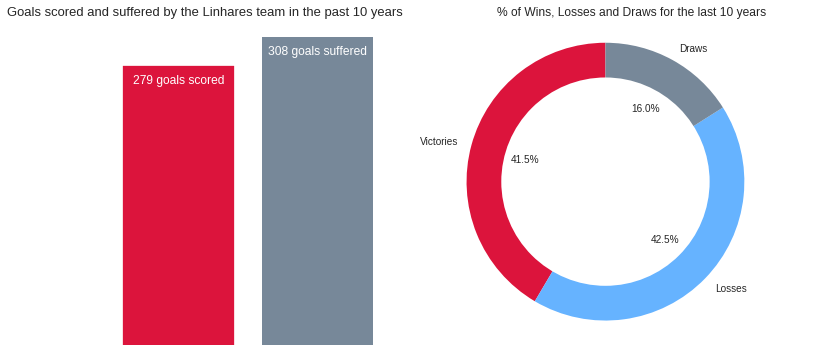

In [115]:
# Pie chart
labels = ['Victories', 'Losses', 'Draws']
sizes = [victory_percentage, loses_percentage, draw_percentage]

objects = ('Gols Pro','Goals Con')
pos = np.arange(len(objects))


#colors
colors = ['crimson','#66b3ff','lightslategrey']

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5),sharex = True)

goals = list(df[['Linhares Goals','Other teams Goals']].sum())

bars = ax1.bar(pos, goals,color='lightslategrey', bottom = 0.0)
bars[0].set_color('crimson')

ax1.set_xticks(pos, ('Gols Pro','Goals Con'))

ax1.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Make some labels.
'''labels = goals'''


height0 = bars[0].get_height()
height1 = bars[1].get_height()

ax1.text(bars[1].get_x() + rect.get_width() / 2, height1 - 20, '308'+' '+'goals suffered',
            ha='center', va='bottom', color='w', fontsize=12)

ax1.text(bars[0].get_x() + rect.get_width() / 2, height0 -20 , '279'+' '+'goals scored',
            ha='center', va='bottom', color='w', fontsize=12)
    
'''for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 13, str(int(height)) +' '+ 'goals', 
                 ha='center', color='w', fontsize=15)'''
ax1.grid(False)

ax1.set_title('Goals scored and suffered by the Linhares team in the past 10 years',fontsize=13);   


ax2.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('% of Wins, Losses and Draws for the last 10 years')
#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.patch.set_facecolor('w')
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.show()
fig.savefig('linharesSoccer.png', format='png');

**As we can see the Linhares team has not performed well in the past 10 years. Based on the charts, we were able to conclude that the team suffered more goals than scored and that the number of victories is less than the number of loses**